# <center>Визуализация результатов кластеризации</center>

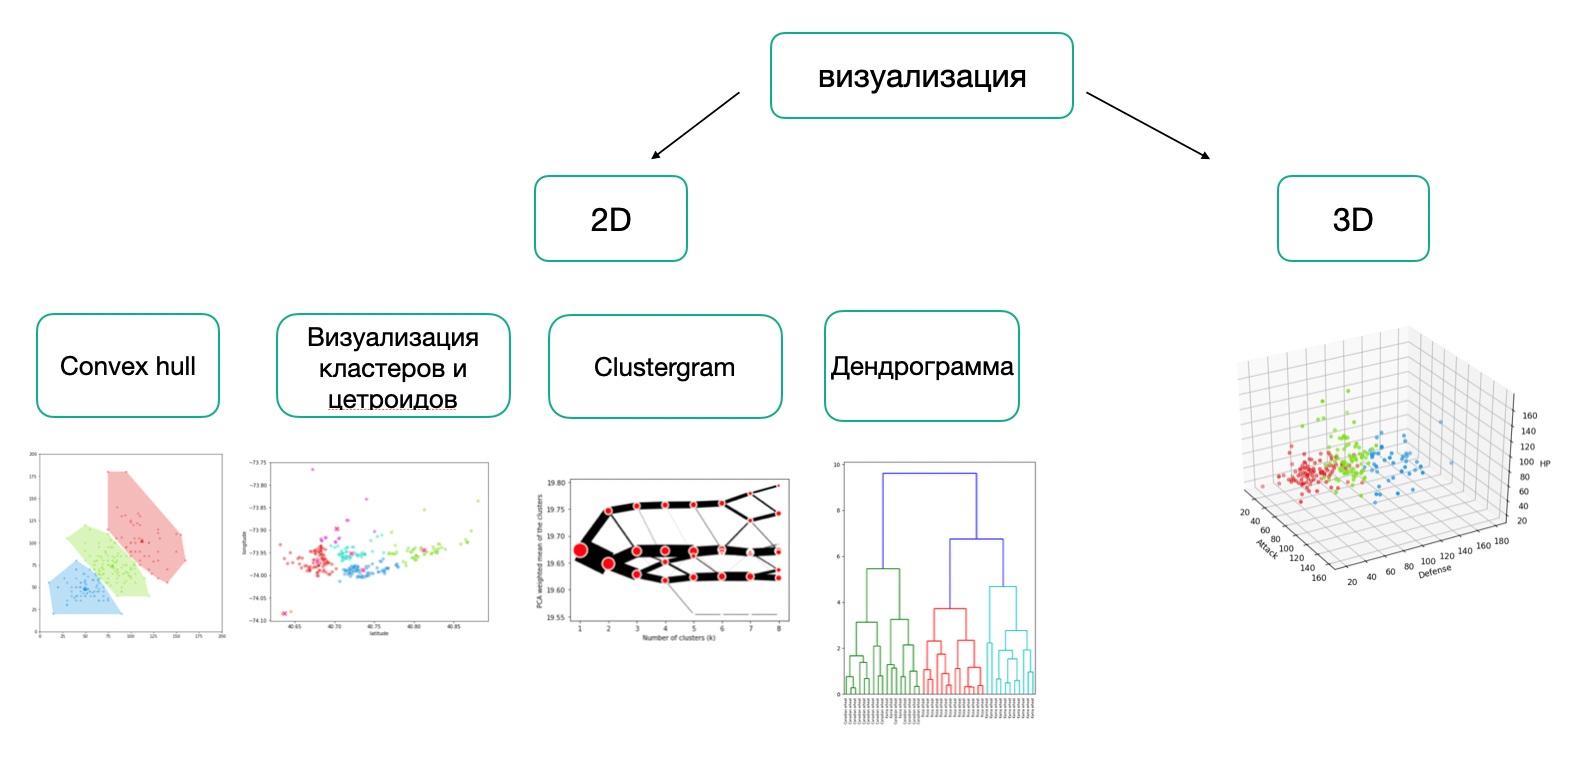

## <center>Визуализация кластеров и их центроидов(2D)</center>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("data/airbnb.zip")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


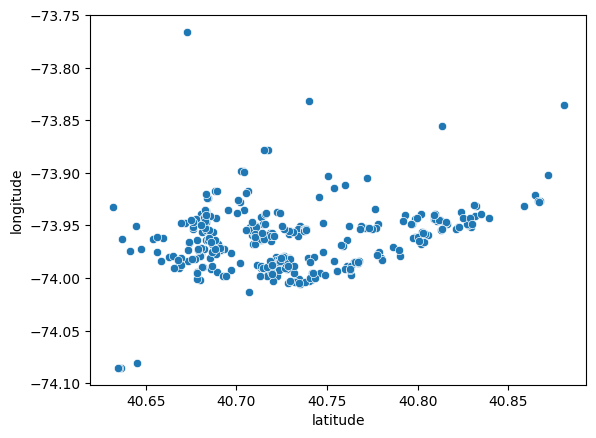

In [3]:
sns.scatterplot(x=df['latitude'], y=df['longitude']);

In [4]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions


# с помощью атрибута cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

In [7]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5,40.677489,-73.967397,#DF8520
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,40.767529,-73.973729,#81DF20
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2,40.818934,-73.941395,#2095DF
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,5,40.677489,-73.967397,#DF8520
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2,40.818934,-73.941395,#2095DF


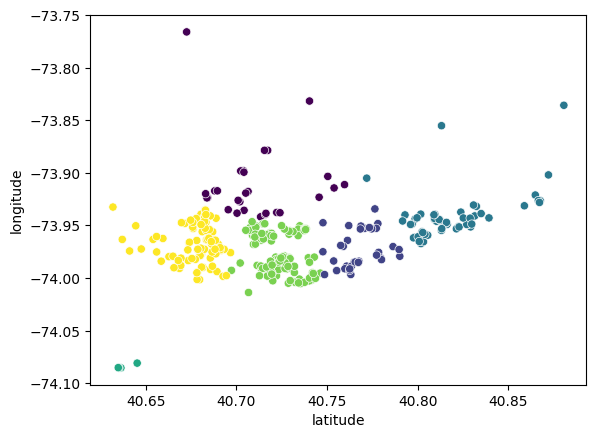

In [10]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.clusters);

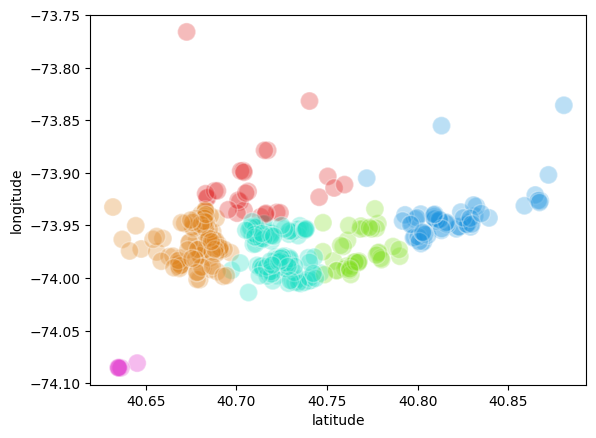

In [14]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.3, s=170);

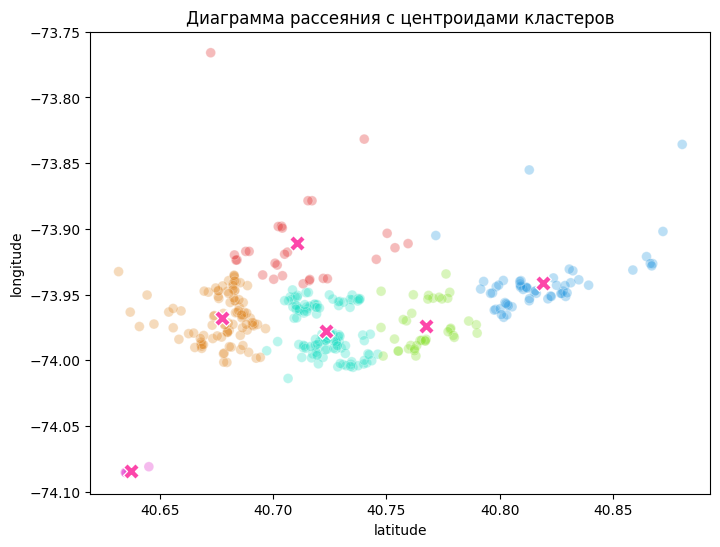

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.3, ax=ax)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130, ax=ax)
ax.set_title('Диаграмма рассеяния с центроидами кластеров');

# <center>Convex Hull</center>

>**Выпуклая оболочка (Convex Hull) множества точек** — это такое выпуклое множество точек, в котором лежат все точки фигуры.

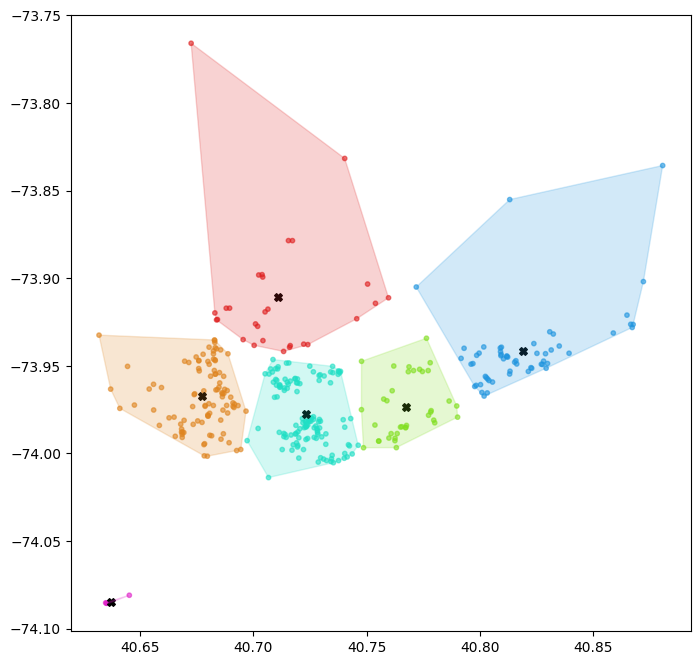

In [22]:
from scipy.spatial import ConvexHull 
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(x=df.latitude, y=df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(x=centroids_x, y=centroids_y, marker='X', c=['black'], s=30)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])


# <center>Дендрограмма</center>
>Данный способ визуализации необходим, если мы хотим визуализировать результаты иерархической кластеризации.

На дендрограмме можно:
* наблюдать, как работал алгоритм: как объединялись (или разбивались) кластеры;
* понять, насколько похожи соседние кластеры между собой;
* предположить, какое количество кластеров можно было бы выбрать для кластеризации.

`scipy.cluster.hierarchy.[dendrogram, linkage]`
* `linkage` — это способ расчёта расстояния между двумя кластерами. В переменной method можно задать разные способы расчёта расстояния: `single, complete, average, weighted, centroid, median, ward`.
* `dendrogram` - строит дендрограмму, основываясь на информации о расстоянии объектов, полученной из функции `linkage`. Данная информация позволяет строить на дендрограмме ветви разной высоты.
    * `Z` — расстояния до объектов кластеров, полученные из функции `linkage`.
    * `orientation` — ориентация дендрограммы. Данный параметр может принимать значения `top, bottom, left, right`.
    * `labels` — список с предсказаниями, к какому кластеру какой объект относится.
    * `distance_sort` — определяет, в каком порядке будут визуализированы кластеры: `ascending` или `True` означает, что сначала отрисовывается пара кластеров с максимальным расстоянием между ними; `descending` или `False` — что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.
    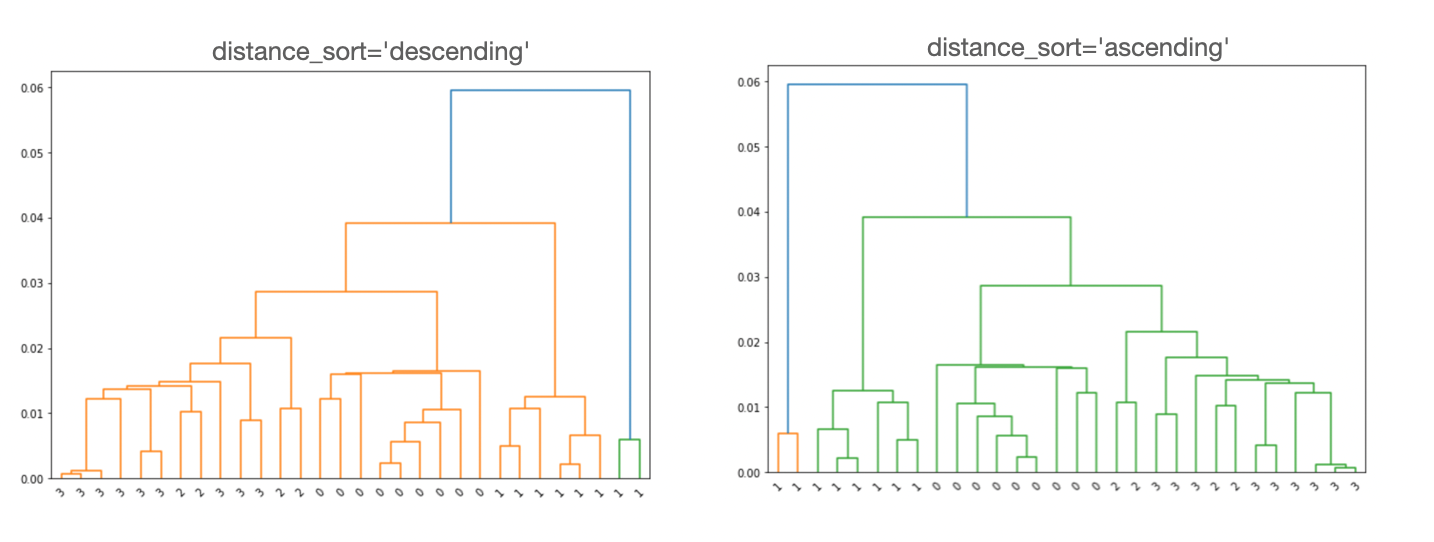


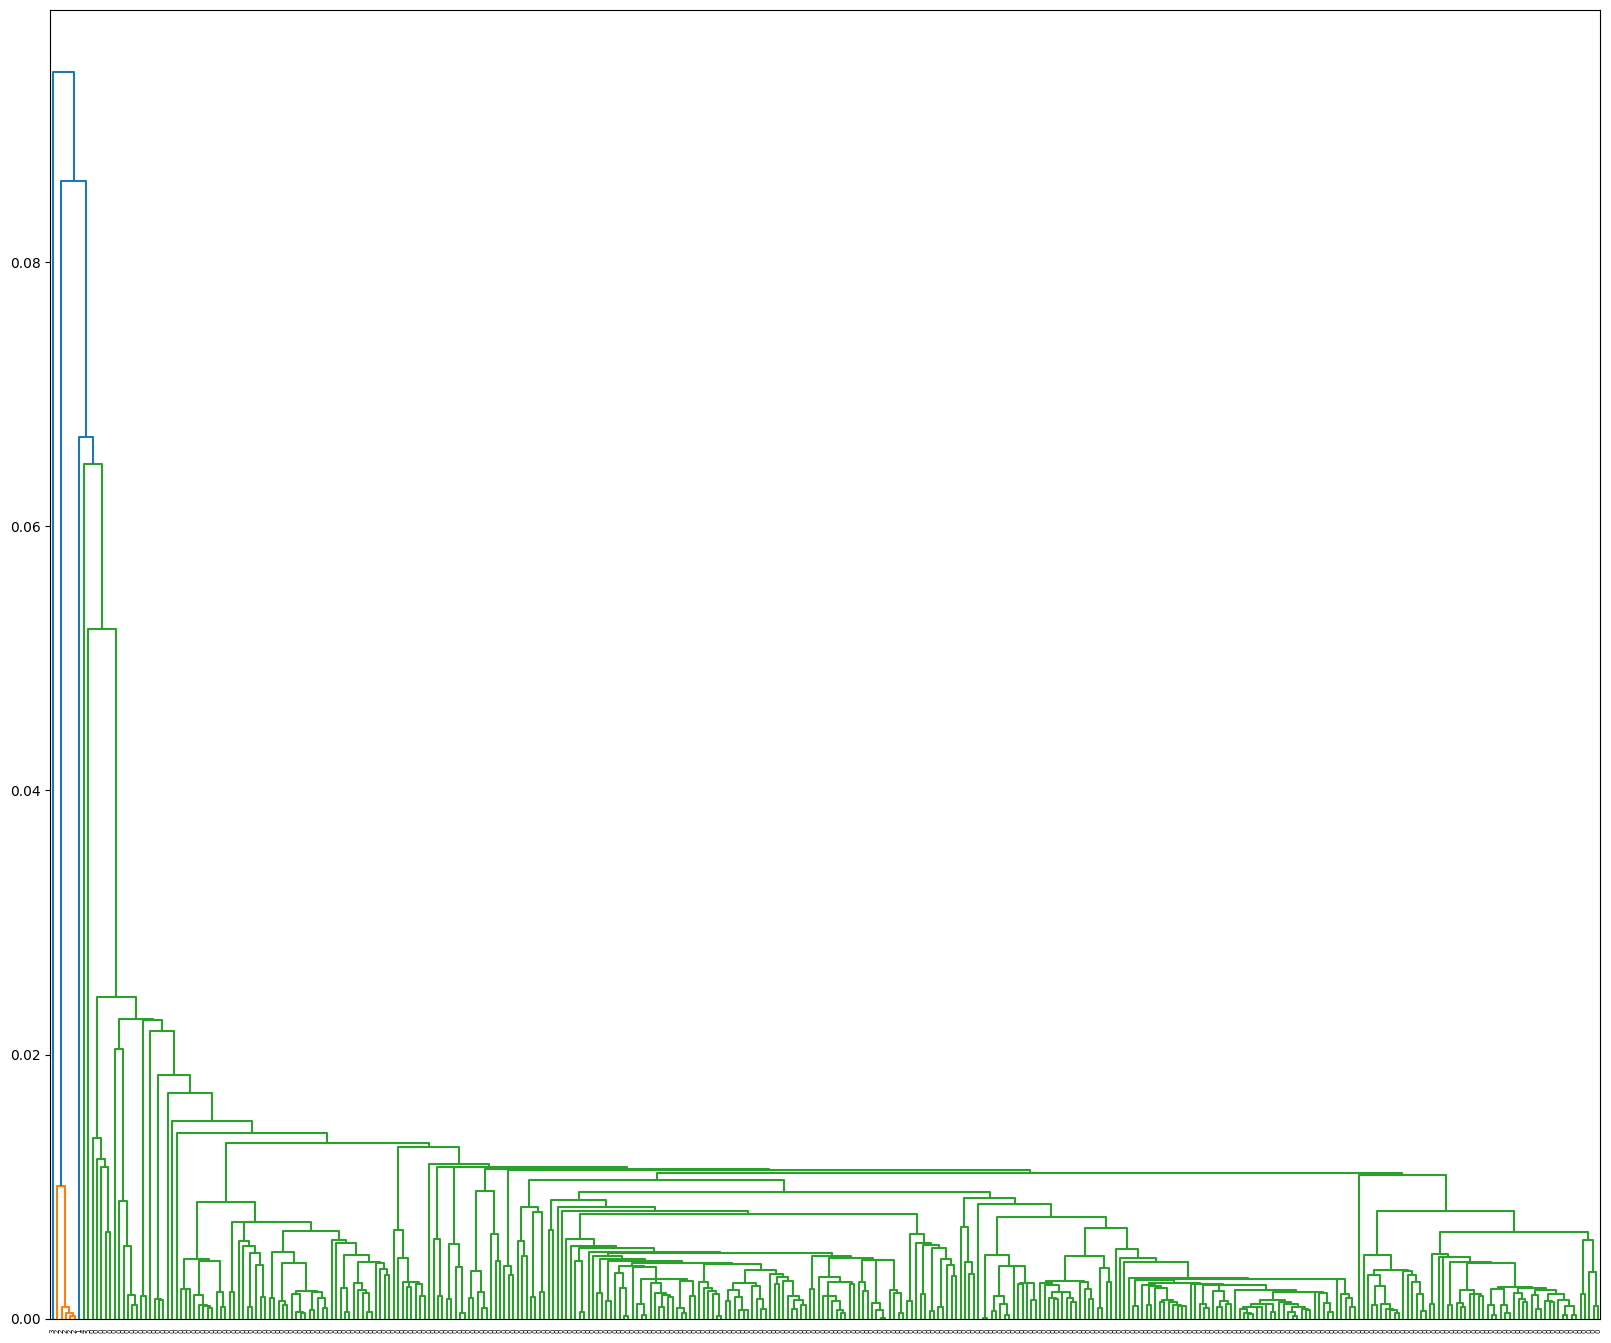

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(
    Z=linked,
    orientation='top',
    labels=predictions_ag_model,
    distance_sort='ascending'
);

# <center>Clustergram</center>
>Данная визуализация позволяет понять, что происходит с данными при разном количестве кластеров, и полезна при исследовательском анализе. Также она может быть полезна и для иерархической кластеризации, когда объектов много и дендрограмма получается сложной для понимания.

Изначально все наблюдения образуют единый кластер (исходные данные). После данные делятся на два кластера. При этом можно заметить, что нижняя линия толще — это означает, что во второй кластер попало больше объектов. Далее данные делятся на три кластера, при этом второй снизу кластер образуется путём слияния некоторых элементов из двух предыдущих кластеров.

Построить такой график можно не для всех алгоритмов кластеризации, а только для *k-means*, *GMM* и *иерархической кластеризации*. Метод кластеризации задаётся в поле `method`, по умолчанию выбрана k-means-кластеризация.

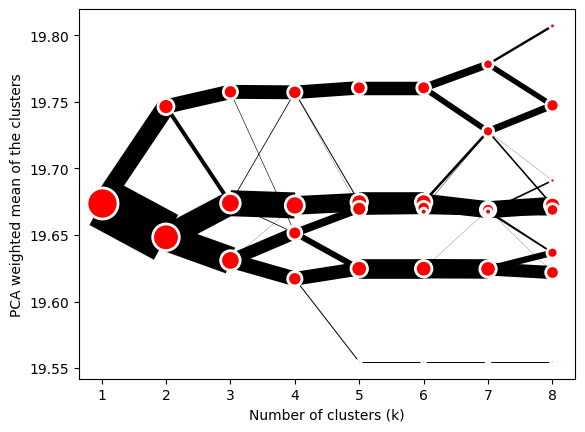

In [32]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans', verbose=False)

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot();

# <center>3D-визуализация</center>

In [33]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

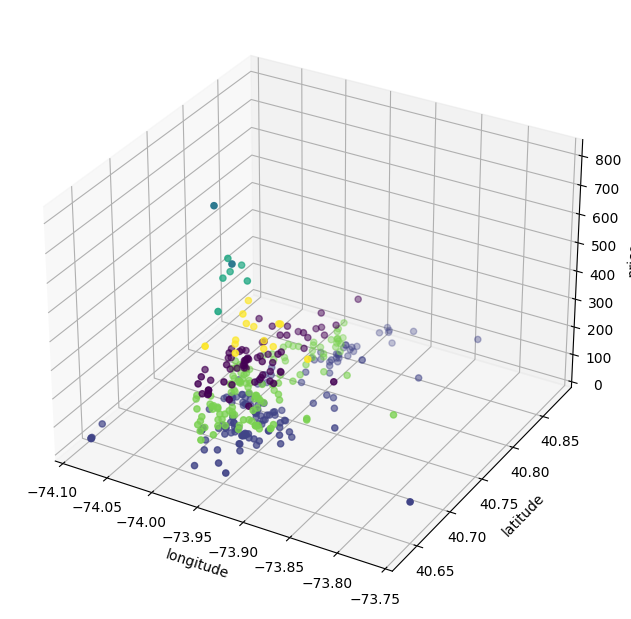

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price');

Изменим угол визуализации


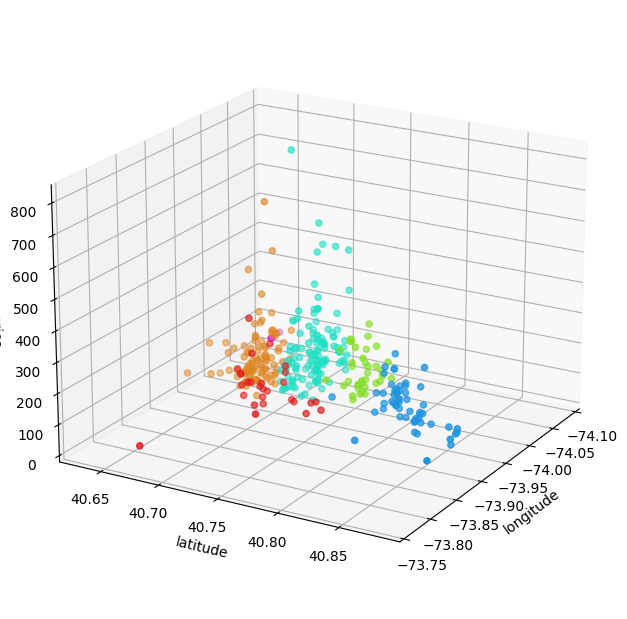

In [37]:
# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.color)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price');

In [39]:
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x='longitude', 
    y='latitude', 
    z='price', 
    color='clusters', 
    width=1000,
    height=700,
    opacity=0.4
)

#отображаем график
fig.show()

8.4

In [52]:
ax.get_xbound()

(0.0, 3500.0)

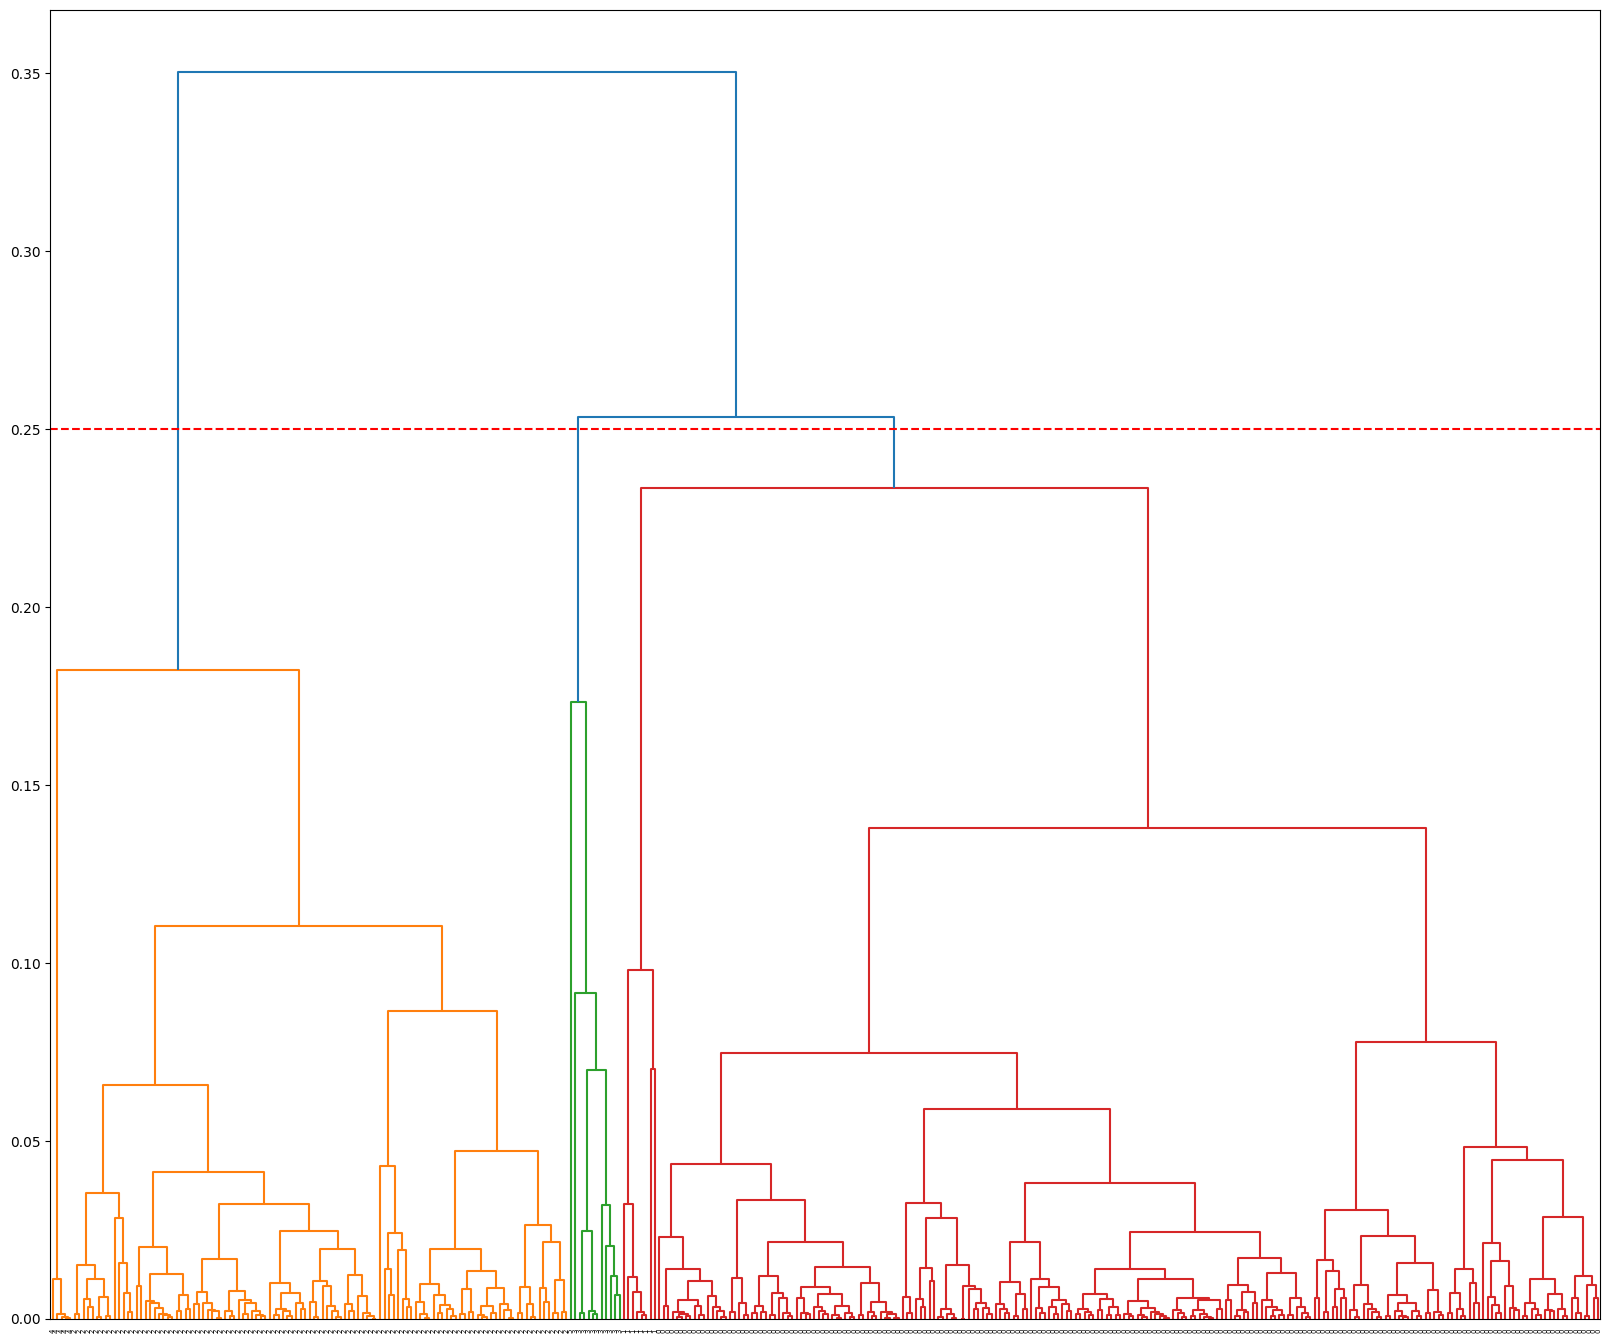

In [57]:
# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'complete')

fig, ax = plt.subplots(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(
    Z=linked,
    orientation='top',
    labels=predictions_ag_model,
    distance_sort='ascending',
    ax=ax
);
ax.hlines(y=0.25, xmin=ax.get_xbound()[0], xmax=ax.get_xbound()[1], linestyles='--', colors='red');

8.5

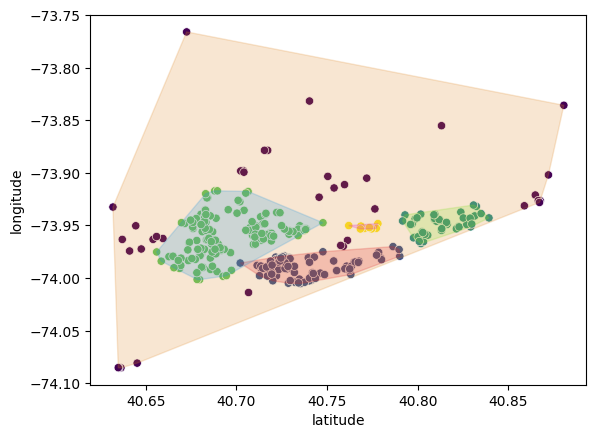

In [79]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.012, min_samples=6)
df['clusters_db'] = pd.Series(dbscan.fit_predict(df[['latitude', 'longitude']]))

sns.scatterplot(x=df['latitude'], y=df['longitude'], c=df['clusters_db'])

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters_db.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters_db == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])